In [1]:
### RFE  - Recursive Feature Elemination
# 1. Recursive Feature Elemination
# 2. RFE with Scikit Learn
# 3. RFE Hyper Parameters

### RFE with Scikit Learn

#### RFE for Classification

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

##Define data-set
X,y = make_classification(n_samples=1000, n_features=10,n_informative=5,n_redundant=5,random_state=1)

print(X.shape,y.shape)

D:\Anaconda_Distribution\envs\newEnv\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(1000, 10) (1000,)


In [7]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

##Define data-set
X,y = make_classification(n_samples=1000, n_features=10,n_informative=5,n_redundant=5,random_state=1)

print(X.shape,y.shape)

#create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=5)

model = DecisionTreeClassifier()

pipeline = Pipeline([("s",rfe),("m",model)])

# Evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

n_scores = cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

# report performance
print("Accuracy  %.3f  (%.3f)"%(np.mean(n_scores),np.std(n_scores)))

(1000, 10) (1000,)
Accuracy  0.886  (0.031)


####  RFE for Regression

In [9]:
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor

X,y = make_regression(n_samples=1000,n_features=10,n_informative=5,random_state=1)

print(X.shape,y.shape)

rfe = RFE(estimator=DecisionTreeRegressor(),n_features_to_select=5)
model = DecisionTreeRegressor()

pipeline = Pipeline([('s',rfe),('m',model)])

cv = RepeatedKFold(n_splits=10,n_repeats=3,random_state=1)

n_scores = cross_val_score(pipeline,X,y,scoring="neg_mean_absolute_error",cv=cv,n_jobs=-1)

# report performance
print("MAE : %.3f  (%.3f)"%(np.mean(n_scores),np.std(n_scores)))

(1000, 10) (1000,)
MAE : -27.458  (2.870)


### RFE Hyperparameters

#### Explore number of features

> 2 0.884 (0.033)
> 3 0.886 (0.035)
> 4 0.888 (0.030)
> 5 0.881 (0.033)
> 6 0.886 (0.033)
> 7 0.887 (0.032)
> 8 0.884 (0.032)
> 9 0.885 (0.035)


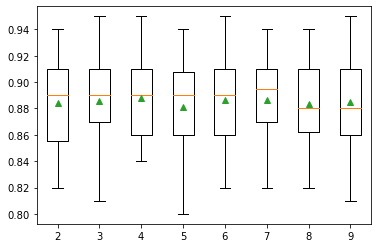

In [10]:
import matplotlib.pyplot as plt

## get dataset
def get_dataset(classtype):
    if classtype == "reg":
        X,y = make_regression(n_samples=1000,n_features=10,n_informative=5,random_state=1)
    elif classtype == "cls":
        X,y = make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,random_state=1)
    
    return X,y

#get a list of models to evaluate
def get_models():
    models = {}
    
    for i in range(2,10):
        rfe = RFE(estimator= DecisionTreeClassifier(),n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline([('s',rfe),('m',model)])
    return models

#Evaluate the given model using cross validation

def evaluate_model(model,X,y,):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    n_scores = cross_val_score(pipeline,X,y,scoring="accuracy",cv=cv,n_jobs=-1)
    return n_scores

#define dataset
X,y = get_dataset('cls')

# define models
models = get_models()

#evaluate the models and score results
results,names = [],[]
for name,model  in models.items():
    scores =  evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('> %s %.3f (%.3f)'%(name,np.mean(scores),np.std(scores)))

#Plot model performance for comparison
plt.boxplot(results,labels=names,showmeans=True)
plt.show()
    

####  Automatically select the number of features

In [11]:
from sklearn.feature_selection import RFECV

X,y = make_classification(n_samples=1000, n_features=10,n_informative=5,n_redundant=5,random_state=1)

print(X.shape,y.shape)

#create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())

model = DecisionTreeClassifier()

pipeline = Pipeline([("s",rfe),("m",model)])

# Evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

n_scores = cross_val_score(pipeline,X,y,cv=cv,scoring="accuracy",n_jobs=-1)

# report performance
print("Accuracy  %.3f  (%.3f)"%(np.mean(n_scores),np.std(n_scores)))

(1000, 10) (1000,)
Accuracy  0.887  (0.026)


##### Which features were selected

In [15]:
X,y = make_classification(n_samples=1000, n_features=10,n_informative=5,n_redundant=5,random_state=1)

print(X.shape,y.shape)

#create pipeline
#rfe = RFECV(estimator=DecisionTreeClassifier())
rfe = RFE(estimator=DecisionTreeClassifier(),n_features_to_select=5)
# fit RFE
rfe.fit(X,y)

for i in range(X.shape[1]):
    print('Column %d , Selected = %s , Rand : %d' %(i,rfe.support_[i],rfe.ranking_[i]))

(1000, 10) (1000,)
Column 0 , Selected = False , Rand : 5
Column 1 , Selected = False , Rand : 4
Column 2 , Selected = True , Rand : 1
Column 3 , Selected = True , Rand : 1
Column 4 , Selected = True , Rand : 1
Column 5 , Selected = False , Rand : 6
Column 6 , Selected = True , Rand : 1
Column 7 , Selected = False , Rand : 3
Column 8 , Selected = True , Rand : 1
Column 9 , Selected = False , Rand : 2


### Explore Base Algorithm

> lr 0.884 (0.025)
> pr 0.881 (0.030)
> dr 0.887 (0.033)
> rf 0.888 (0.027)
> gb 0.880 (0.028)


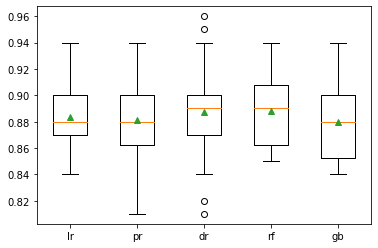

In [18]:
## Explore the algorithms wrapped by RFE
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


import matplotlib.pyplot as plt

## get dataset
def get_dataset(classtype):
    if classtype == "reg":
        X,y = make_regression(n_samples=1000,n_features=10,n_informative=5,random_state=1)
    elif classtype == "cls":
        X,y = make_classification(n_samples=1000,n_features=10,n_informative=5,n_redundant=5,random_state=1)
    
    return X,y

#get a list of models to evaluate
def get_models():
    models = {}
    
    #Lr
    rfe = RFE(estimator= LogisticRegression(),n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline([('s',rfe),('m',model)])
    
    
    # Pr
    rfe = RFE(estimator= Perceptron(),n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['pr'] = Pipeline([('s',rfe),('m',model)])
    
    #Dr
    rfe = RFE(estimator= DecisionTreeClassifier(),n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['dr'] = Pipeline([('s',rfe),('m',model)])
    
    #Rf
    rfe = RFE(estimator= RandomForestClassifier(),n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline([('s',rfe),('m',model)])
    
    #Gb
    rfe = RFE(estimator= GradientBoostingClassifier(),n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gb'] = Pipeline([('s',rfe),('m',model)])
    
    return models

#Evaluate the given model using cross validation

def evaluate_model(model,X,y,):
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
    n_scores = cross_val_score(pipeline,X,y,scoring="accuracy",cv=cv,n_jobs=-1)
    return n_scores

#define dataset
X,y = get_dataset('cls')

# define models
models = get_models()

#evaluate the models and score results
results,names = [],[]
for name,model  in models.items():
    scores =  evaluate_model(model,X,y)
    results.append(scores)
    names.append(name)
    print('> %s %.3f (%.3f)'%(name,np.mean(scores),np.std(scores)))

#Plot model performance for comparison
plt.boxplot(results,labels=names,showmeans=True)
plt.show()